### TED-Talks Data Analysis

#### TED Conferences LLC (Technology, Entertainment, Design) is a media organization that posts talks online for free distribution under the slogan "ideas worth spreading." TED was founded in February 1984[5] as a conference which has been held annually since 1990.[6] TED's early emphasis was on technology and design, consistent with its Silicon Valley origins, but it has since broadened its repertoire to include talks on many scientific, cultural, and academic topics.[7] It is owned by Chris Anderson, a British American businessman, through the Sapling foundation.


#### I have been an ardent follower of this knowledge sharing platform, in this document I have tried to analyze different aspects of the talks, subjects, most viewed and other Data Analytics using Unsupervised Learning Techniques

### Importing required libraries here

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize


### Importing Data here 

In [6]:
data = pd.read_csv('C:/Users/chakrdip/Desktop/R-Projects/Kaggle/TED-Talks/ted_main.csv')

In [7]:
data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


### Feature Descriptions

### Features Available
### name: The official name  of the TED Talk. Includes the title and the speak####er.
#### title: The title of the talk
#### description: A blurb of what the talk is about.
#### main_speaker: The first named speaker of the talk.
#### speaker_occupation: The occupation of the main speaker.
#### num_speaker: The number of speakers in the talk.
#### duration: The duration of the talk in seconds.
#### event: The TED/TEDx event where the talk took place.
#### film_date: The Unix timestamp of the filming.
#### published_date: The Unix timestamp for the publication of the talk on TED.com
#### comments: The number of first level comments made on the talk.
#### tags: The themes associated with the talk.
#### languages: The number of languages in which the talk is available.
#### ratings: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
#### related_talks: A list of dictionaries of recommended talks to watch next.
#### url: The URL of the talk.
#### views: The number of views on the talk.


### Changing the Date and Time Attributes which are in Unix timestamps to date-month-year format

In [11]:
import datetime
data['film_date'] = data['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
data['published_date'] = data['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))


ValueError: invalid literal for int() with base 10: '25-02-2006'

In [12]:
data.head(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,25-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,24-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,26-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,27-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,22-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,28-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


### 10 most viewed TED-Talks

In [14]:
most_viewed_talks = data[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:10]
most_viewed_talks

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,25-02-2006
1346,Your body language may shape who you are,Amy Cuddy,43155405,26-06-2012
677,How great leaders inspire action,Simon Sinek,34309432,17-09-2009
837,The power of vulnerability,Brené Brown,31168150,06-06-2010
452,10 things you didn't know about orgasm,Mary Roach,22270883,06-02-2009
1776,How to speak so that people want to listen,Julian Treasure,21594632,10-06-2013
201,My stroke of insight,Jill Bolte Taylor,21190883,27-02-2008
5,Why we do what we do,Tony Robbins,20685401,02-02-2006
2114,This is what happens when you reply to spam email,James Veitch,20475972,08-12-2015
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,27-10-2012


### Observations :

#### Do schools kill creativity? it is the highest number of viewed TED talk with more than 47.2 million views
    

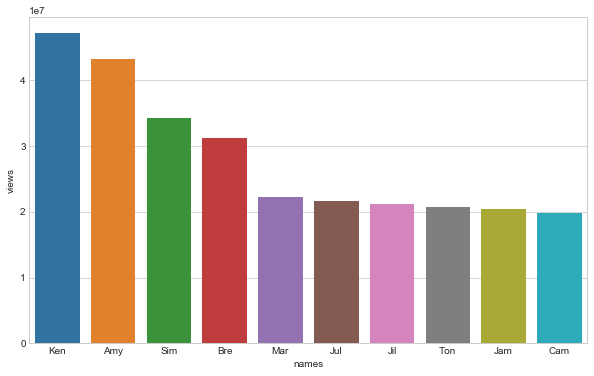

In [19]:
most_viewed_talks['names'] = most_viewed_talks['main_speaker'].apply(lambda x: x[:3])
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='names', y='views', data=most_viewed_talks)

### How are the views distributed in general ?

C:\Users\chakrdip\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


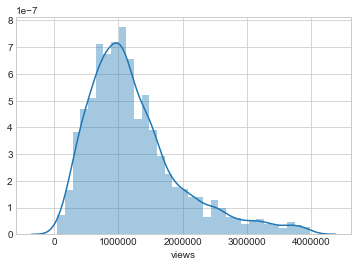

In [23]:
sns.distplot(data[data['views'] < 0.4e7]['views'])     ###getting data knowing max number of views are less than 0.4e7

In [24]:
data['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

### Derived Observations

#### Average number of views = 1.6 million
#### Maximum number of views = 4.7 million

### Working on Comments

In [26]:
data['comments'].describe()


count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

C:\Users\chakrdip\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


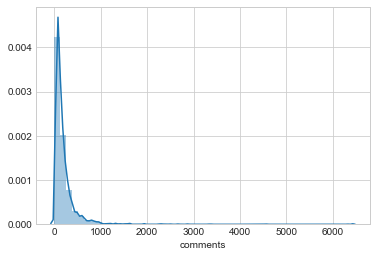

In [27]:
sns.distplot(data['comments'])

### Correlation between views and comments

C:\Users\chakrdip\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\chakrdip\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


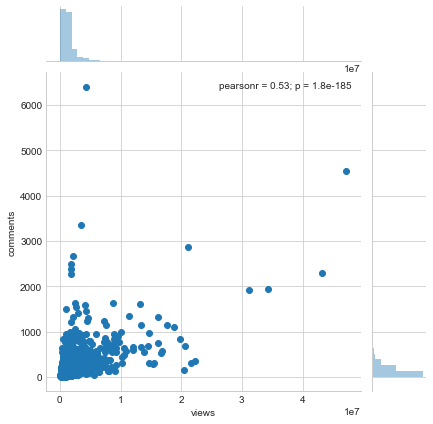

In [30]:
sns.jointplot(x='views', y='comments', data = data)

In [31]:
data[['views', 'comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


### The Pearson Coefficients are more than 0.5, indicating medium to strong correlation between views and comments

### Views and comments of ten most commented TED-Talks

In [32]:
data[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


### Observations

#### We see here that Mititant Atheism invited more comments(or discussion) compared to Ken Robinson's talk on Do schools kill creativity? This is interesting to find out more, we will create a new feature discussion quotient for all the talks and sort accordingly

In [35]:
data['discussion_quotient'] = data['comments']/data['views']

In [38]:
data[['title', 'main_speaker','views', 'comments', 'discussion_quotient', 'film_date']].sort_values('discussion_quotient', ascending=False).head(10)

,title,main_speaker,views,comments,discussion_quotient,film_date
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,02-12-2009
803,E-voting without fraud,David Bismark,543551,834,0.001534,14-07-2010
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464,02-02-2002
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,10-02-2010
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,03-03-2011
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,10-10-2010
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,08-12-2010
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,18-03-2014
661,The danger of science denial,Michael Specter,1838628,2272,0.001236,11-02-2010
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235,04-11-2009


### Observations 

#### Interestingly the top 10 talks having highest discussion quotient are related to Science and Religion, the most discussed beling The case for same-sex marriage, which was a very debated topic during the time of release at 2009. This analysis gives more understanding on how different topics have engaged more discussions across viewership

### What about timelines ? Is there a particular month of the year triggering more viewership or is it independent ?

In [39]:

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

data['month'] = data['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])
month_df = pd.DataFrame(data['month'].value_counts()).reset_index()
month_df.columns = ['month', 'talks']

In [42]:
month_df.head(5)

,month,talks
0,Feb,601
1,Mar,397
2,Jun,270
3,Jul,253
4,Nov,232


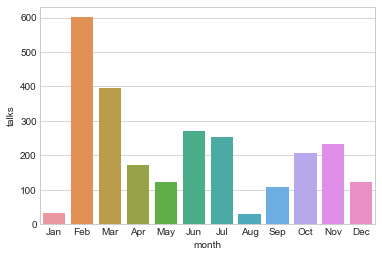

In [43]:
sns.barplot(x='month', y='talks', data=month_df, order=month_order)

#### Interesting ! The TED talks released are maximum during Feb, it is generally because it is the time of TED conferences during the part of the Year. Lets try find out the distribution only for Tedx

In [48]:
df_x = data[data['event'].str.contains('TEDx')]
x_month_df = pd.DataFrame(df_x['month'].value_counts().reset_index())
x_month_df.columns = ['month', 'talks']

In [51]:
x_month_df.head()

,month,talks
0,Nov,95
1,Oct,65
2,Apr,55
3,Sep,51
4,May,43


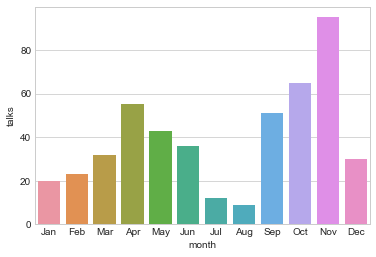

In [52]:
sns.barplot(x='month', y='talks', data = x_month_df, order= month_order)